In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Input Image.png to Input Image.png


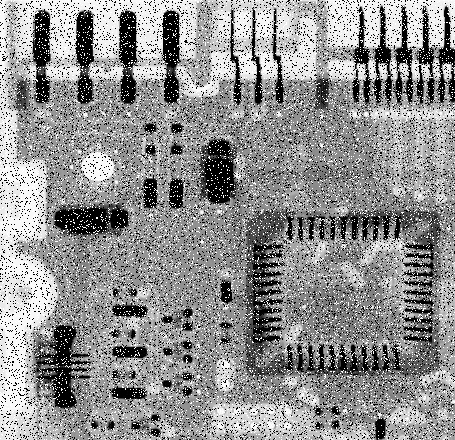

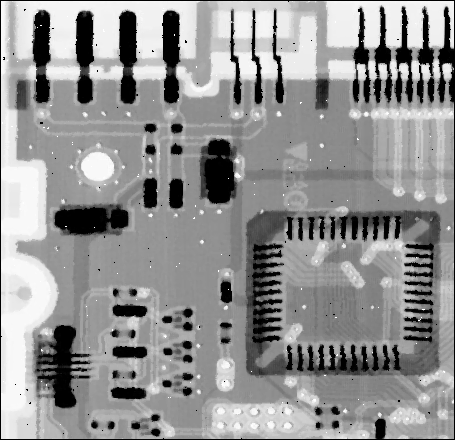

In [9]:
# Read the image
img_noisy1 = cv2.imread('Input Image.png', 0)
cv2_imshow(img_noisy1)

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.png', img_new1)
cv2_imshow(img_new1)


Here, we can see that after implementing median filtering over the input image, there is no presence of salt and pepper noise in it. Therefore by implementing the spatial domain median filter, we have removed the salt and pepper noise.

Peak signal-to-noise ratio (PSNR) is the ratio between the maximum possible power of an image and the power of corrupting noise that affects the quality of its representation. To estimate the PSNR of an image, it is necessary to compare that image to an ideal clean image with the maximum possible power.

RMSE is the root mean squared error.

Here, we have an original image and it’s filtered version, let’s see the PSNR value for the image.

In [11]:

from google.colab import files
uploaded = files.upload()

Saving Input Image.png to Input Image (1).png


In [12]:

from google.colab import files
uploaded = files.upload()

Saving Median Filtered Image.png to Median Filtered Image.png


In [13]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(img_noisy1, img_new1):
	mse = np.mean((img_noisy1 - img_new1) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	img_noisy1 = cv2.imread("Input Image.png")
	img_new1 = cv2.imread("Median Filtered Image.png", 1)
	value = PSNR(img_noisy1, img_new1)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()


PSNR value is 32.651193688943145 dB


PSNR is most commonly used to estimate the efficiency of compressors, filters, etc. The larger the value of PSNR, the more efficient is a corresponding compression or filter method.
